<a href="https://colab.research.google.com/github/yousefalaqra/Descending_into_ML/blob/main/Descending_into_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Descending into ML: Linear Regression

It has long been known that crickets (an insect species) chirp more frequently on hotter days than on cooler days. For decades, professional and amateur scientists have cataloged data on chirps-per-minute and temperature. As a birthday gift, your Aunt Ruth gives you her cricket database and asks you to learn a model to predict this relationship. Using this data, you want to explore this relationship.

create a simple synthetic dataset for practicing linear regression in Python.


In [ ]:
import numpy as np
import pandas as pd

# NumPy and pandas
Using tf.keras requires at least a little understanding of the following two open-source Python libraries:


*  [NumPy](https://numpy.org/), which simplifies representing arrays and performing linear algebra operations.
*   [pandas](https://pandas.pydata.org/), which provides an easy way to represent datasets in memory.





In [ ]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
temperature = np.random.uniform(low=60, high=100, size=100)
chirps_per_minute = 20 + 0.5 * temperature + np.random.normal(scale=5, size=100)

# Create a DataFrame
data = pd.DataFrame({'Temperature': temperature, 'Chirps_Per_Minute': chirps_per_minute})

# Display the first few rows of the dataset
print(data.head())

# Save the dataset to a CSV file
data.to_csv('cricket_dataset.csv', index=False)

   Temperature  Chirps_Per_Minute
0    74.981605          57.926038
1    98.028572          67.519249
2    89.279758          65.098683
3    83.946339          52.035325
4    66.240746          52.022013


Let's break down why both NumPy and Pandas are commonly used in the context of machine learning, and I'll explain their roles in a way that's easy to understand.



---



# **NumPy:**
NumPy is a powerful numerical computing library in Python. It provides support for large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.


# Why it's used in ML:



*   **Efficient Array Operations**: Machine learning involves a lot of numerical operations, like matrix multiplication, element-wise operations, and linear algebra. NumPy provides an efficient way to perform these operations, making your code faster and more readable.
*   **Memory Efficiency**: NumPy arrays are more memory-efficient than Python lists, which is crucial when dealing with large datasets in machine learning.
*   **Interfacing with Other Libraries**: Many other machine learning libraries, like scikit-learn and TensorFlow, are built on top of NumPy arrays. Using NumPy makes it easy to integrate different libraries seamlessly.












# **Pandas**:
Pandas is a data manipulation and analysis library. It provides data structures like DataFrames that are designed for easy handling and manipulation of structured data.

# Why it's used in ML:


*   **Data Handling**: In machine learning, you often work with datasets, which are essentially tables of data. Pandas DataFrames provide a convenient way to load, manipulate, and analyze these datasets.
*   **Data Cleaning and Preprocessing**: Before feeding data into machine learning models, it often requires cleaning and preprocessing. Pandas offers powerful tools for handling missing data, filtering, grouping, and transforming data.
*   **Integration with NumPy**: Pandas is built on top of NumPy, so it seamlessly integrates with NumPy arrays. You can easily convert between NumPy arrays and Pandas DataFrames.






# **Example in the context of the Cricket Dataset:**
**NumPy**: In the script I provided earlier, NumPy was used to generate synthetic data efficiently and perform mathematical operations.

**Pandas**: Once the data is generated, it's organized into a Pandas DataFrame. Pandas can be used to explore the dataset, perform statistical analysis, and prepare the data for training a machine learning model.



---





In summary, NumPy is great for numerical operations and efficient array handling, while Pandas excels in data manipulation and analysis, making them a powerful combination for machine learning tasks.


# Now, let's examine our data by plotting it

In [ ]:
import matplotlib.pyplot as plt

We can use the popular matplotlib library for this purpose.

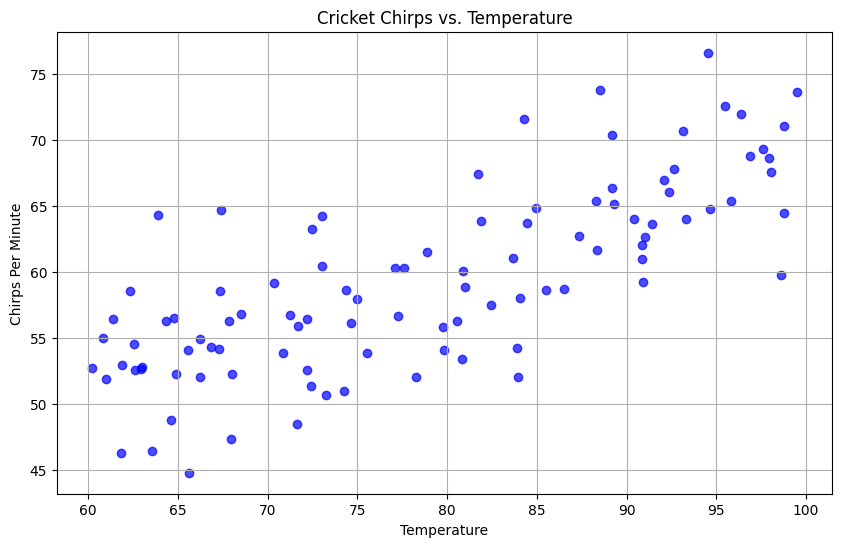

In [ ]:
# Load the dataset
data = pd.read_csv('cricket_dataset.csv')

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Chirps_Per_Minute'], color='blue', alpha=0.7)
plt.title('Cricket Chirps vs. Temperature')
plt.xlabel('Temperature')
plt.ylabel('Chirps Per Minute')
plt.grid(True)
plt.show()


Matplotlib is commonly used in the context of machine learning for data visualization. While it might not be directly involved in the training or evaluation of machine learning models, it plays a crucial role in the exploratory data analysis (EDA) phase and in communicating results. Here are some common use cases:




*   Data Exploration: Matplotlib is used to create various types of plots and charts to explore the characteristics of the dataset. Scatter plots, histograms, box plots, and line plots are frequently employed to understand the distribution, relationships, and patterns in the data.

*   Model Evaluation: After training a machine learning model, Matplotlib can be used to visualize the model's performance. For example, plotting learning curves, confusion matrices, or ROC curves can provide insights into how well the model is performing.

*   Feature Importance: Matplotlib is often used to visualize feature importance, helping to understand which features contribute the most to the predictive power of the model. This is particularly relevant in decision tree-based models.

*   Hyperparameter Tuning: During hyperparameter tuning, Matplotlib can be used to plot the performance of the model for different hyperparameter values. This helps in selecting the best combination of hyperparameters.

*  Presenting Results: Matplotlib is used to create visualizations for reports, presentations, or dashboards to communicate the findings and results of the machine learning analysis.













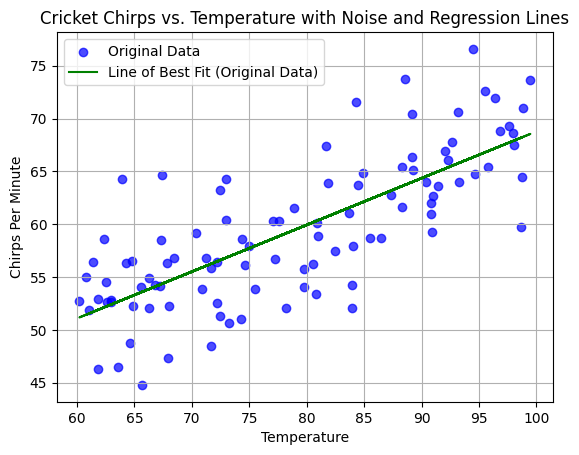

In [34]:
from sklearn.linear_model import LinearRegression

# Linear regression on the original data
regression_model_original = LinearRegression()
regression_model_original.fit(data[['Temperature']], data['Chirps_Per_Minute'])
original_line = regression_model_original.predict(data[['Temperature']])

plt.scatter(data['Temperature'], data['Chirps_Per_Minute'], color='blue', alpha=0.7, label='Original Data')
plt.plot(data['Temperature'], original_line, color='green', label='Line of Best Fit (Original Data)')


plt.title('Cricket Chirps vs. Temperature with Noise and Regression Lines')
plt.xlabel('Temperature')
plt.ylabel('Chirps Per Minute')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Create a copy of the original dataset
noisy_data = data.copy()

# Add Gaussian noise to the Temperature column
noise = np.random.normal(loc=0, scale=8, size=len(data))
noisy_data['Temperature'] = noisy_data['Temperature'] + noise


# Noise

In the context of data and machine learning, "noise" refers to random variations or errors in the data that do not follow any specific pattern or trend. These variations can arise from various sources, including measurement errors, sampling variability, or external factors that affect the data. Noise introduces randomness into the data and can make it more challenging for machine learning models to identify underlying patterns.



---



**Adding noise to a dataset is a common practice in machine learning for several reasons:**



*   Realism: Real-world data is often noisy. By adding noise to a synthetic dataset, you make it more representative of the challenges that a model might face when working with actual data.

*   Model Robustness: Introducing noise can make a model more robust by helping it generalize better to unseen data. A model that performs well on a noisy dataset is likely to be more resilient to variations in real-world data.

*   Regularization: In some cases, adding noise to the input data can act as a form of regularization, preventing the model from fitting the training data too closely and overfitting.



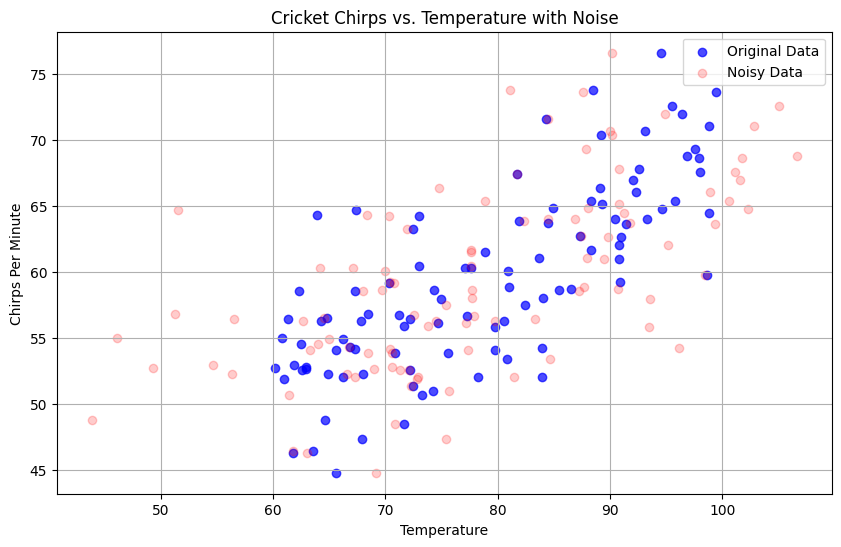

In [ ]:
# Scatter plot with both original and noisy data
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Chirps_Per_Minute'], color='blue', alpha=0.7, label='Original Data')
plt.scatter(noisy_data['Temperature'], data['Chirps_Per_Minute'], alpha=0.2, label='Noisy Data', color='red')

plt.title('Cricket Chirps vs. Temperature with Noise')
plt.xlabel('Temperature')
plt.ylabel('Chirps Per Minute')
plt.legend()
plt.grid(True)
plt.show()

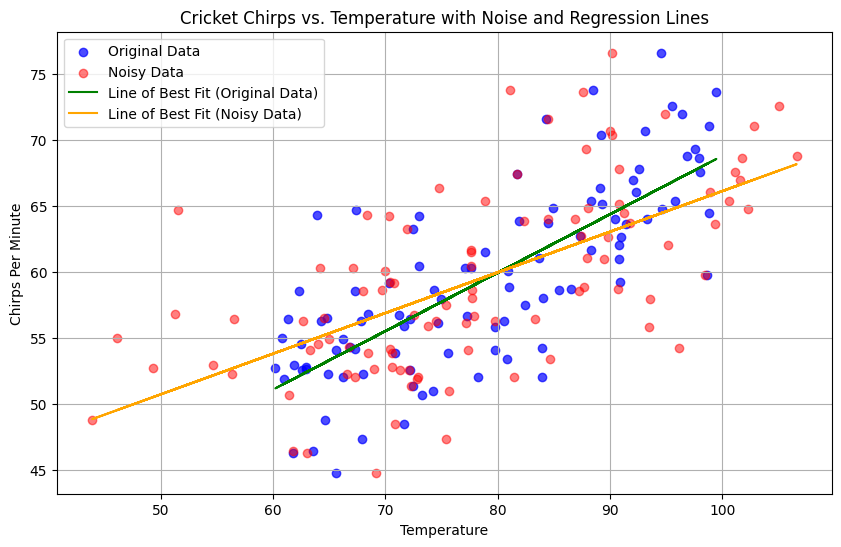

In [ ]:
# Linear regression on the noisy data
regression_model_noisy = LinearRegression()
regression_model_noisy.fit(noisy_data[['Temperature']], data['Chirps_Per_Minute'])
noisy_line = regression_model_noisy.predict(noisy_data[['Temperature']])

# Scatter plot with both original and noisy data
plt.figure(figsize=(10, 6))
plt.scatter(data['Temperature'], data['Chirps_Per_Minute'], color='blue', alpha=0.7, label='Original Data')
plt.scatter(noisy_data['Temperature'], data['Chirps_Per_Minute'], alpha=0.5, label='Noisy Data', color='red')

# Plot lines of best fit
plt.plot(data['Temperature'], original_line, color='green', label='Line of Best Fit (Original Data)')
plt.plot(noisy_data['Temperature'], noisy_line, color='orange', label='Line of Best Fit (Noisy Data)')

plt.title('Cricket Chirps vs. Temperature with Noise and Regression Lines')
plt.xlabel('Temperature')
plt.ylabel('Chirps Per Minute')
plt.legend()
plt.grid(True)
plt.show()
